# *IMPORT LIBRARY*

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from numpy.linalg import eig
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py
from scipy.stats import shapiro
from pingouin import multivariate_normality
from sklearn.decomposition import PCA
import plotly.express as px
from pca import pca
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis
from factanal.wrapper import factanal
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

#warning
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)



In [2]:
import sys
!{sys.executable} -m pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


# *DATASET UPLOAD*

In [4]:
df = pd.read_excel("veri.xlsx")
df.drop("Şehirler",axis=1,inplace=True)

In [116]:
df.head(15)

,Üniversite mezunu olması\nGraduated from a University,Yüksek gelir sahibi/varlıklı olması \nHigh income level,Varlıklı bir aileden olması\nBeing from a wealthy family,Çalışma saatlerinin belli olması\nWorking at certain working hours,İlk kez evlenecek olması\nBeing married for the first time,Gelir getirici bir işinin olması\nHaving an income generating job,Aile yapılarının benzer olması\nSimilarity of family structures,Dindar olması\nBeing religious,Aynı etnik kökenden olması\nComing from same ethnic origin,Benzer siyasi görüşe sahip olması\nSimilarity of political view,Aynı mezhepten olması\nBeing from the same religious sect,Aynı memleketten/ hemşeri olması\nBeing from the same hometown,Eşine aşık olması\nFalling in love with her husband,Ev işleri ve çocukların bakımını paylaşması\nSharing house chores and childcare,Ev işlerinde becerikli olması\nBeing skilled in house chores,Yakışıklı olması\nBeing handsome,Bakımlı ve özenli olması\nBeing caring and attentive,Kendinden büyük olması\nBeing older than herself,Benzer hayat tarzına sahip olması\nSimilarity of lifestyle
0,46.02,39.75,29.17,81.35,75.27,92.07,83.87,74.85,64.38,44.16,61.01,31.78,80.95,82.30,70.38,40.15,83.22,51.12,82.73
1,42.25,42.39,44.20,70.46,76.01,87.22,84.72,73.96,78.67,45.06,67.69,24.35,73.79,81.88,66.79,50.87,88.19,45.56,84.43
2,56.32,41.74,28.79,74.74,80.92,91.63,73.33,65.34,53.66,46.86,68.11,30.62,82.25,85.95,79.86,54.04,86.67,52.64,75.87
3,42.98,35.89,24.26,73.70,72.56,87.70,74.80,73.08,66.11,41.44,61.29,17.52,76.73,74.85,72.86,36.07,76.52,42.95,88.25
4,40.60,36.77,25.63,80.71,72.32,80.35,76.67,84.39,74.05,44.97,58.59,23.31,79.01,76.83,78.98,39.31,86.55,53.01,72.34
5,44.90,40.93,30.36,72.07,75.24,82.84,70.67,82.71,56.17,42.69,64.32,21.24,76.29,81.39,73.05,45.48,86.52,60.26,74.04
6,46.12,42.35,34.03,75.41,77.55,89.12,74.97,56.46,79.32,35.20,51.19,33.84,84.29,77.91,72.20,54.25,86.62,52.25,92.40
7,45.52,42.83,35.46,75.35,73.73,94.34,78.29,77.18,51.87,44.87,73.46,26.50,73.21,81.56,74.01,42.13,86.62,40.18,85.90
8,45.81,41.93,20.87,82.11,59.88,84.76,76.03,56.20,71.14,44.51,53.72,37.62,85.37,85.69,62.10,35.25,74.21,59.70,77.12
9,43.82,44.92,39.47,70.32,79.94,82.04,72.93,65.15,52.96,43.93,52.59,38.62,81.93,84.49,64.37,34.65,90.88,51.71,86.58


 ### Each observation in the dataset is the license plate of the province in Turkey.


In [8]:
df.shape

(81, 19)

In [9]:
df.dtypes

Üniversite mezunu olması\nGraduated from a University                              float64
Yüksek gelir sahibi/varlıklı olması \nHigh income level                            float64
Varlıklı bir aileden olması\nBeing from a wealthy family                           float64
Çalışma saatlerinin belli olması\nWorking at certain working hours                 float64
İlk kez evlenecek olması\nBeing married for the first time                         float64
Gelir getirici bir işinin olması\nHaving an income generating job                  float64
Aile yapılarının benzer olması\nSimilarity of family structures                    float64
Dindar olması\nBeing religious                                                     float64
Aynı etnik kökenden olması\nComing from same ethnic origin                         float64
Benzer siyasi görüşe sahip olması\nSimilarity of political view                    float64
Aynı mezhepten olması\nBeing from the same religious sect                          float64

In [10]:
df.describe([0,0.05,0.25,0.5,0.75,0.95,0.99,1]).T

,count,mean,std,min,0%,5%,25%,50%,75%,95%,99%,100%,max
Üniversite mezunu olması\nGraduated from a University,81.00,49.44,6.07,40.11,40.11,41.07,43.68,49.80,55.57,58.19,59.50,59.57,59.57
Yüksek gelir sahibi/varlıklı olması \nHigh income level,81.00,39.67,5.75,30.32,30.32,31.48,35.03,39.12,43.80,49.10,51.04,55.54,55.54
Varlıklı bir aileden olması\nBeing from a wealthy family,81.00,32.98,7.64,20.23,20.23,21.89,25.66,33.60,39.96,44.20,45.19,48.70,48.70
Çalışma saatlerinin belli olması\nWorking at certain working hours,81.00,77.25,4.42,70.05,70.05,70.59,73.67,77.17,81.64,83.86,84.45,84.78,84.78
İlk kez evlenecek olması\nBeing married for the first time,81.00,69.60,5.72,59.63,59.63,60.16,65.00,70.18,73.73,78.37,80.14,80.92,80.92
Gelir getirici bir işinin olması\nHaving an income generating job,81.00,87.78,4.18,80.14,80.14,80.97,84.62,87.22,91.63,94.19,94.64,94.78,94.78
Aile yapılarının benzer olması\nSimilarity of family structures,81.00,76.37,4.40,70.15,70.15,70.85,72.89,75.66,79.80,84.11,84.68,84.72,84.72
Dindar olması\nBeing religious,81.00,70.31,8.68,55.87,55.87,56.66,63.27,70.17,77.31,83.57,84.58,84.94,84.94
Aynı etnik kökenden olması\nComing from same ethnic origin,81.00,64.82,9.05,50.09,50.09,51.09,56.79,64.35,73.82,78.45,79.17,79.32,79.32
Benzer siyasi görüşe sahip olması\nSimilarity of political view,81.00,45.35,5.30,35.05,35.05,36.07,41.87,45.06,49.37,53.35,53.74,53.89,53.89


In [11]:
df.isnull().sum()

Üniversite mezunu olması\nGraduated from a University                              0
Yüksek gelir sahibi/varlıklı olması \nHigh income level                            0
Varlıklı bir aileden olması\nBeing from a wealthy family                           0
Çalışma saatlerinin belli olması\nWorking at certain working hours                 0
İlk kez evlenecek olması\nBeing married for the first time                         0
Gelir getirici bir işinin olması\nHaving an income generating job                  0
Aile yapılarının benzer olması\nSimilarity of family structures                    0
Dindar olması\nBeing religious                                                     0
Aynı etnik kökenden olması\nComing from same ethnic origin                         0
Benzer siyasi görüşe sahip olması\nSimilarity of political view                    0
Aynı mezhepten olması\nBeing from the same religious sect                          0
Aynı memleketten/ hemşeri olması\nBeing from the same hometown   

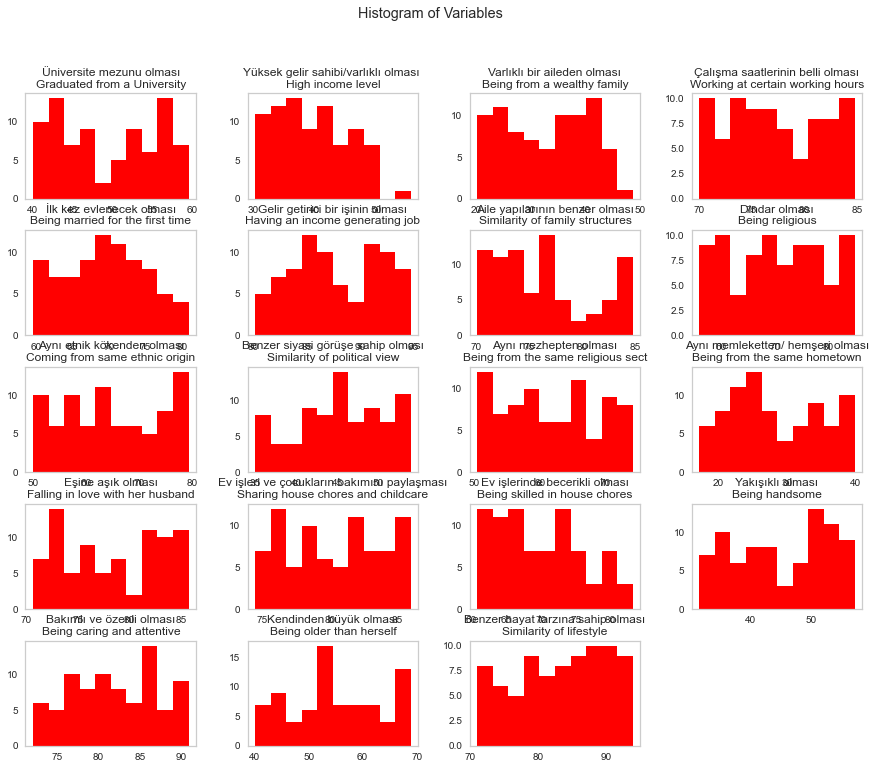

In [13]:
df.hist(layout=(5,4),color="red", figsize=(15,12), grid=False)
plt.suptitle("Histogram of Variables")
plt.show()

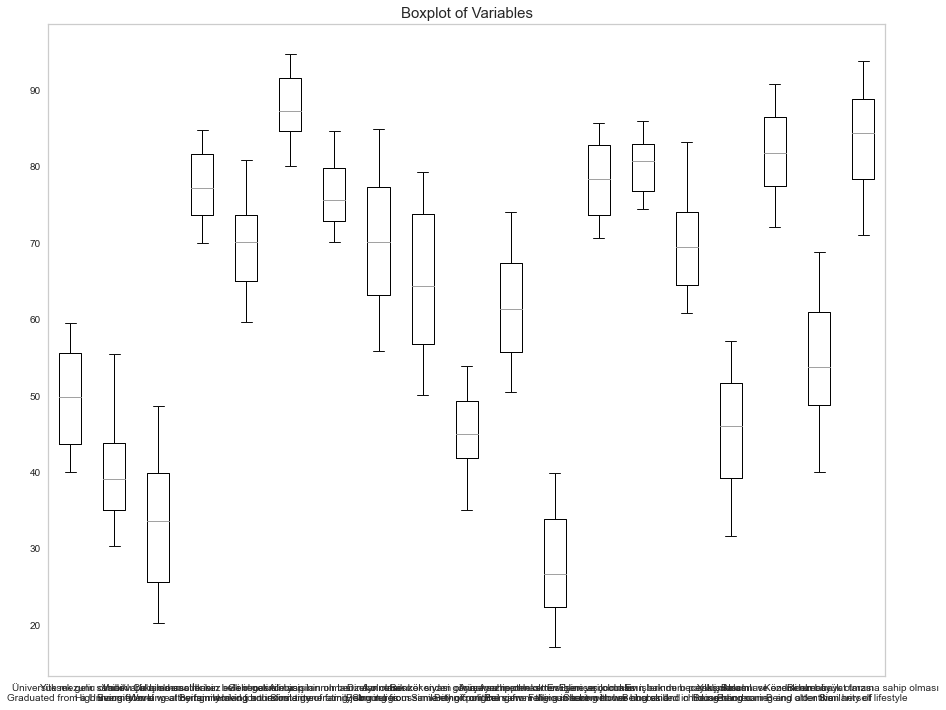

In [14]:
bit = dict(markerfacecolor="b", marker="p")
boxplot = df.boxplot(figsize=(15,12), grid=False,flierprops=bit)
plt.title("Boxplot of Variables",fontsize=15)
plt.show()


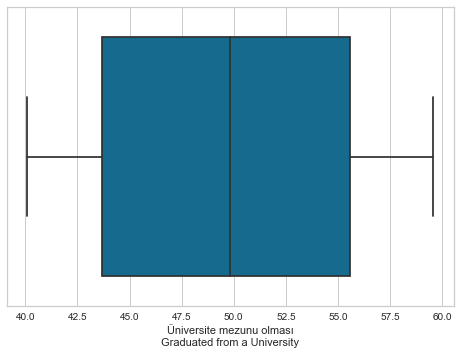

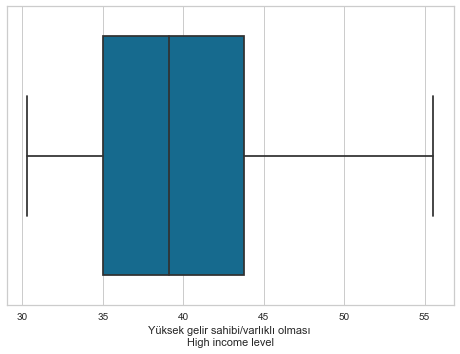

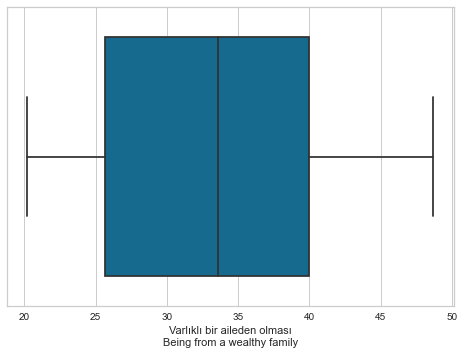

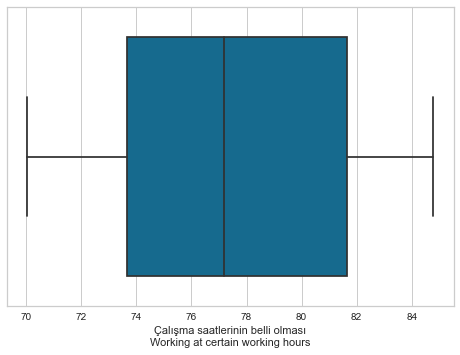

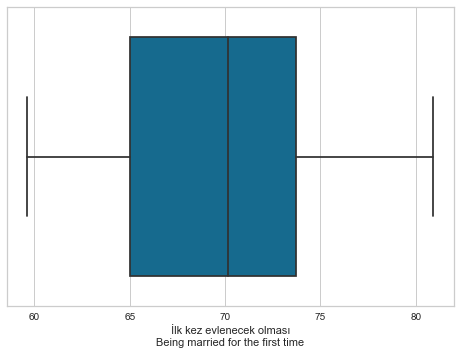

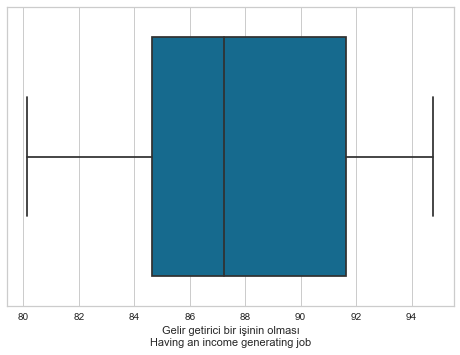

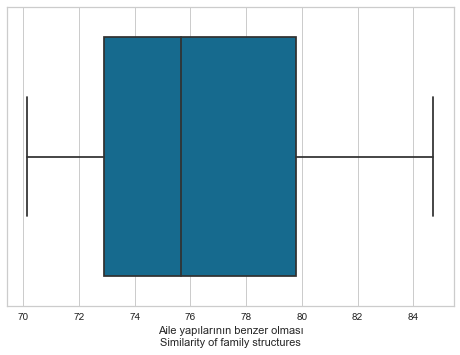

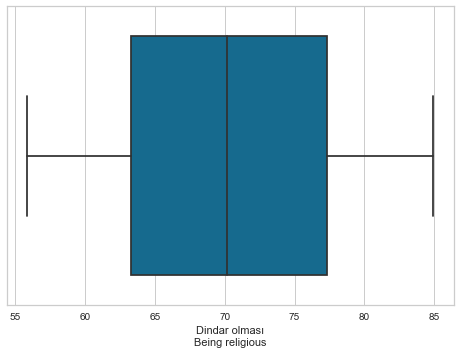

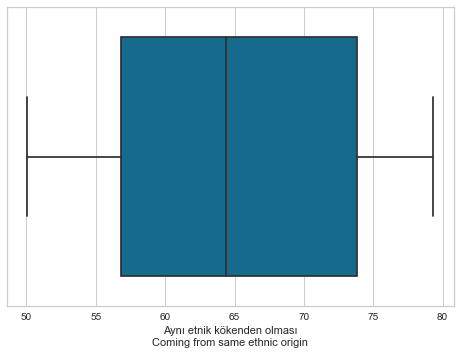

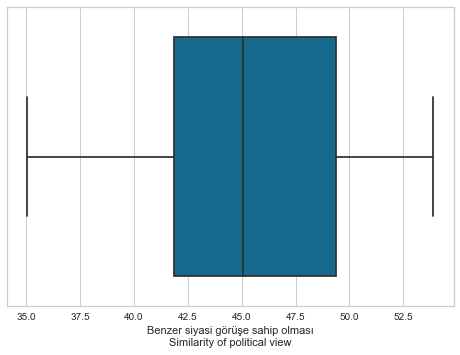

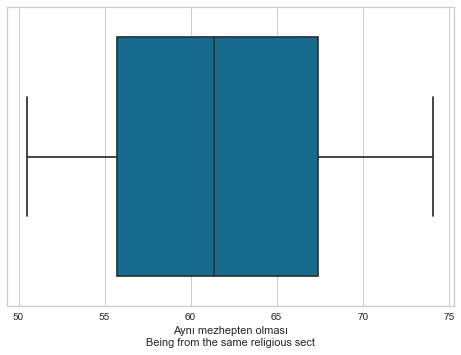

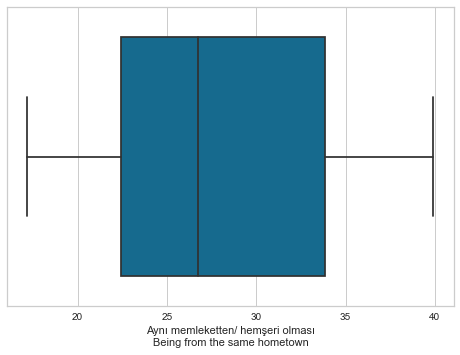

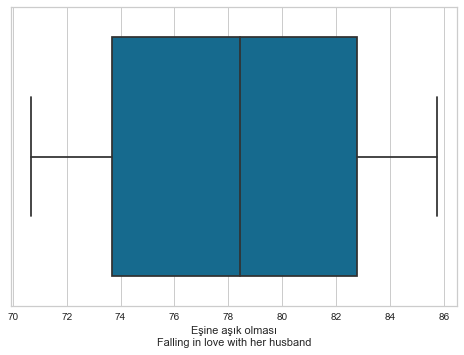

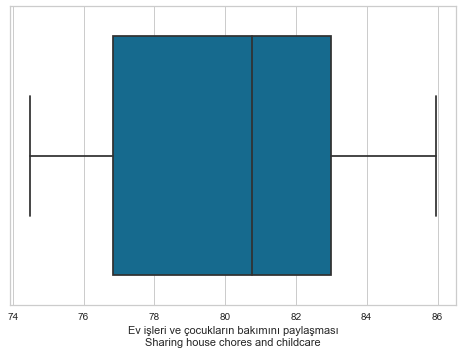

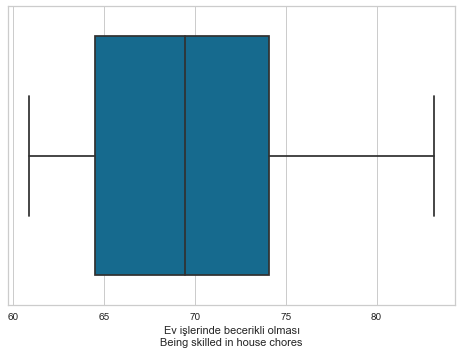

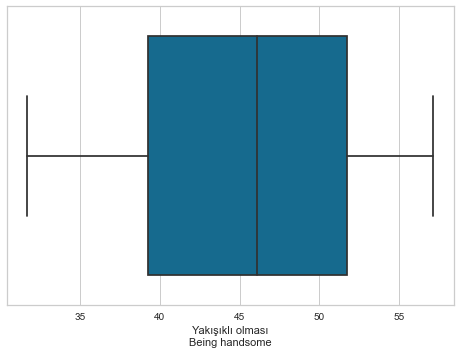

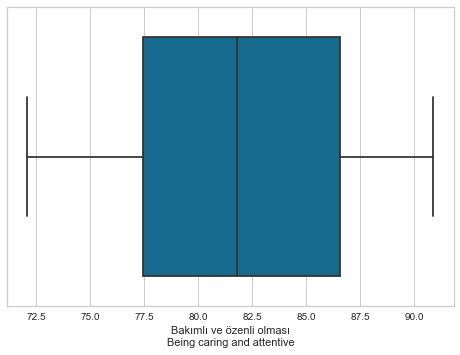

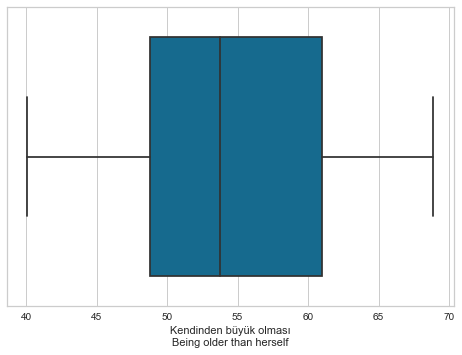

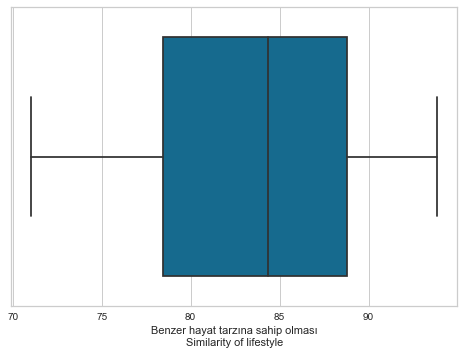

In [15]:
for i in df.columns:
    plt.figure()
    sns.boxplot(x = i , data = df,)
    plt.show()

### *Dataframe to Numpy*

In [20]:
data = df.to_numpy()
data

array([[46.0162416 , 39.74555189, 29.16782136, ..., 83.22282   ,
        51.11726814, 82.73068757],
       [42.2528891 , 42.38969154, 44.1978351 , ..., 88.187     ,
        45.56      , 84.433     ],
       [56.32170813, 41.73658136, 28.79080731, ..., 86.673     ,
        52.641     , 75.868     ],
       ...,
       [57.63257707, 45.49093638, 43.23735096, ..., 90.512     ,
        45.779     , 87.435     ],
       [55.97269245, 47.16834477, 22.61085808, ..., 77.46      ,
        45.519     , 87.129     ],
       [50.52543532, 49.09818166, 40.57728358, ..., 90.191     ,
        66.335     , 83.027     ]])

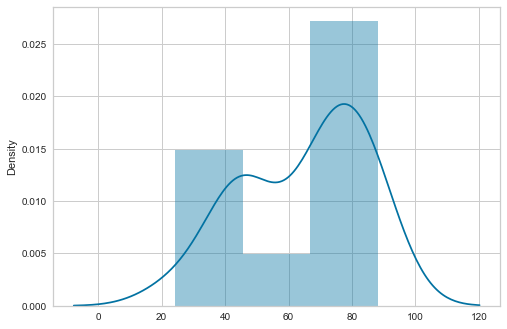

In [21]:
sns.distplot(data[[1]])
plt.show()

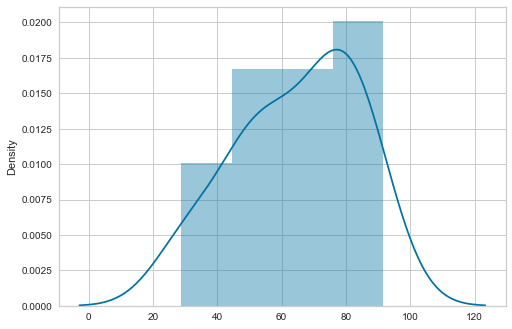

In [22]:
sns.distplot(data[[2]])
plt.show()


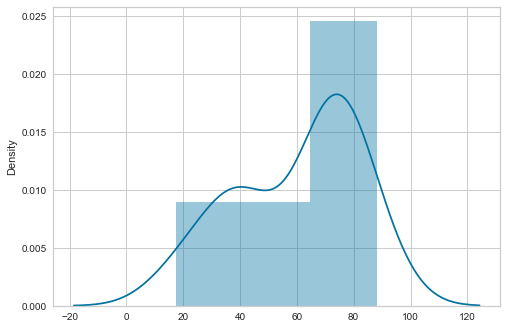

In [23]:
sns.distplot(data[[3]])
plt.show()

### *Tracy Values*

In [24]:
sum(np.diag(data))

1216.586720360603

### *Rank of Data*

In [26]:
np.linalg.matrix_rank(data)

19

### *Mean of Variables*

In [28]:
pd.DataFrame(np.mean(data,axis=0))

,0
0,49.44
1,39.67
2,32.98
3,77.25
4,69.60
5,87.78
6,76.37
7,70.31
8,64.82
9,45.35


### *Correlation Matrix*

In [36]:
corr_matrix = df.corr()
pd.DataFrame(corr_matrix)

,Üniversite mezunu olması\nGraduated from a University,Yüksek gelir sahibi/varlıklı olması \nHigh income level,Varlıklı bir aileden olması\nBeing from a wealthy family,Çalışma saatlerinin belli olması\nWorking at certain working hours,İlk kez evlenecek olması\nBeing married for the first time,Gelir getirici bir işinin olması\nHaving an income generating job,Aile yapılarının benzer olması\nSimilarity of family structures,Dindar olması\nBeing religious,Aynı etnik kökenden olması\nComing from same ethnic origin,Benzer siyasi görüşe sahip olması\nSimilarity of political view,Aynı mezhepten olması\nBeing from the same religious sect,Aynı memleketten/ hemşeri olması\nBeing from the same hometown,Eşine aşık olması\nFalling in love with her husband,Ev işleri ve çocukların bakımını paylaşması\nSharing house chores and childcare,Ev işlerinde becerikli olması\nBeing skilled in house chores,Yakışıklı olması\nBeing handsome,Bakımlı ve özenli olması\nBeing caring and attentive,Kendinden büyük olması\nBeing older than herself,Benzer hayat tarzına sahip olması\nSimilarity of lifestyle
Üniversite mezunu olması\nGraduated from a University,1.00,0.11,0.23,0.04,-0.17,0.15,0.04,-0.11,-0.10,0.03,-0.14,0.08,0.06,-0.16,-0.13,-0.05,0.01,-0.07,-0.16
Yüksek gelir sahibi/varlıklı olması \nHigh income level,0.11,1.00,0.12,0.08,-0.03,-0.11,-0.09,-0.04,-0.03,-0.10,-0.10,0.16,-0.04,-0.04,-0.11,-0.06,-0.05,0.02,0.03
Varlıklı bir aileden olması\nBeing from a wealthy family,0.23,0.12,1.00,-0.12,0.07,0.16,-0.10,0.17,0.04,-0.01,-0.02,-0.01,-0.25,0.08,-0.15,0.09,-0.05,-0.05,-0.08
Çalışma saatlerinin belli olması\nWorking at certain working hours,0.04,0.08,-0.12,1.00,-0.05,-0.12,0.08,-0.18,0.17,0.14,-0.20,0.16,0.05,0.01,0.09,-0.01,-0.13,0.05,-0.05
İlk kez evlenecek olması\nBeing married for the first time,-0.17,-0.03,0.07,-0.05,1.00,-0.02,0.08,0.11,0.18,0.07,0.11,-0.02,0.02,0.06,0.18,0.06,0.13,-0.29,0.18
Gelir getirici bir işinin olması\nHaving an income generating job,0.15,-0.11,0.16,-0.12,-0.02,1.00,-0.02,0.22,-0.15,-0.15,0.05,-0.04,-0.07,0.04,-0.10,0.09,-0.05,0.03,-0.01
Aile yapılarının benzer olması\nSimilarity of family structures,0.04,-0.09,-0.10,0.08,0.08,-0.02,1.00,-0.10,0.16,0.09,-0.01,0.06,-0.01,-0.05,-0.07,-0.15,-0.13,-0.11,0.06
Dindar olması\nBeing religious,-0.11,-0.04,0.17,-0.18,0.11,0.22,-0.10,1.00,-0.04,-0.06,0.02,-0.18,0.04,-0.06,0.04,-0.05,-0.02,0.00,-0.09
Aynı etnik kökenden olması\nComing from same ethnic origin,-0.10,-0.03,0.04,0.17,0.18,-0.15,0.16,-0.04,1.00,-0.15,-0.00,-0.07,0.18,-0.04,0.03,0.03,0.02,-0.20,0.11
Benzer siyasi görüşe sahip olması\nSimilarity of political view,0.03,-0.10,-0.01,0.14,0.07,-0.15,0.09,-0.06,-0.15,1.00,-0.05,-0.02,-0.10,0.08,-0.15,-0.02,-0.02,0.09,0.00


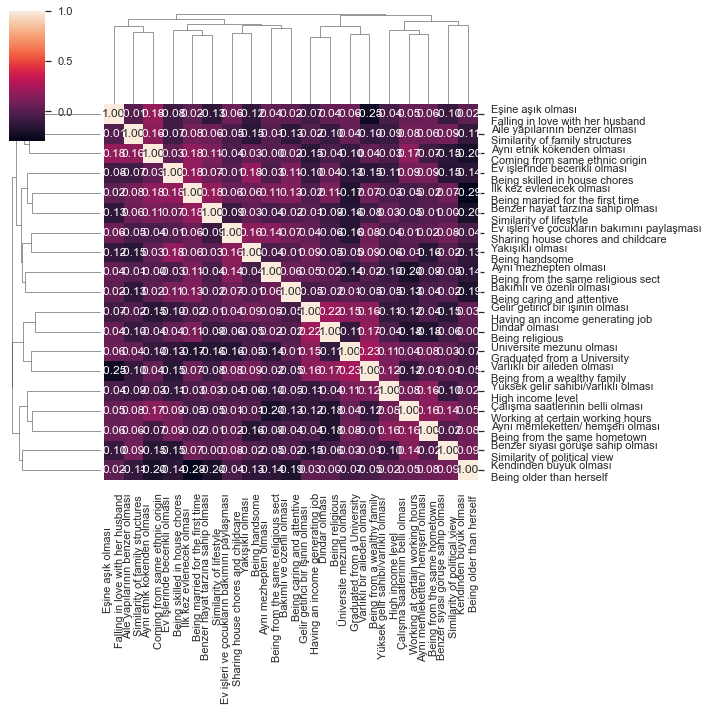

In [35]:
sns.clustermap(corr_matrix, annot=True, fmt = ".2f")
plt.show()

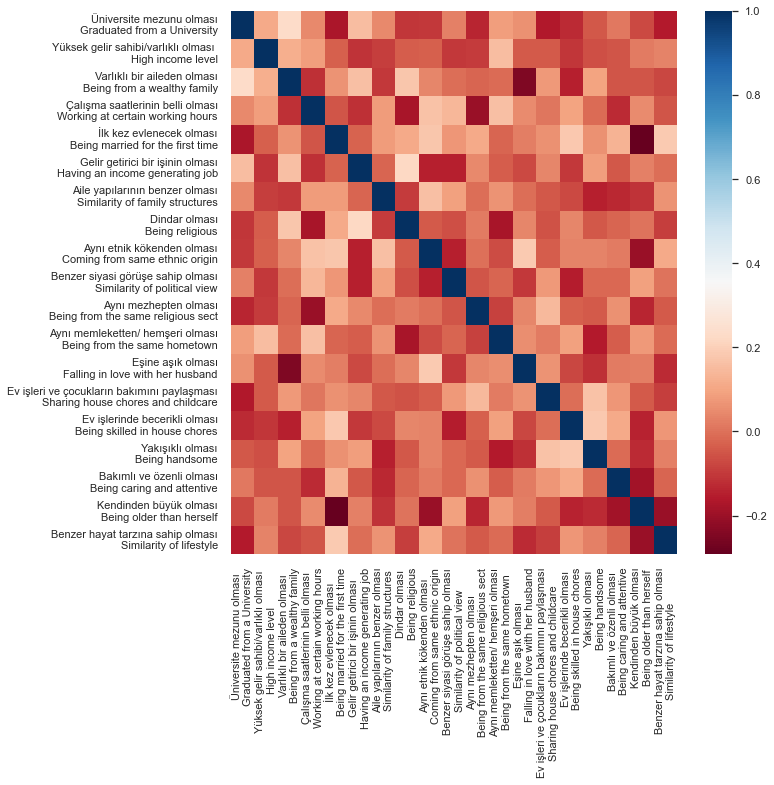

In [38]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(corr_matrix, cmap="RdBu")
plt.show()

### *Covariance Matrix*

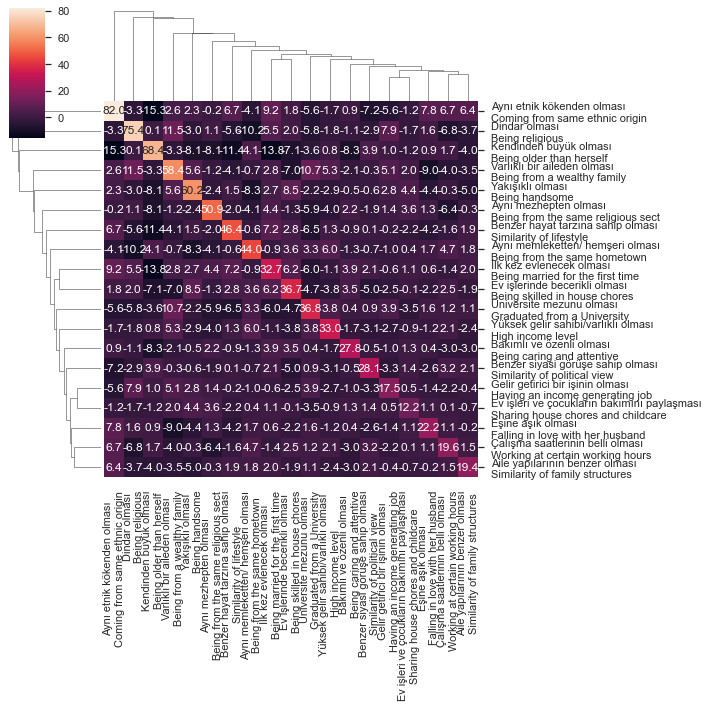

In [40]:
cov_matrix = df.cov()
cov_matrix
sns.clustermap(cov_matrix, annot=True, fmt = ".1f")
plt.show()

In [41]:
pd.DataFrame(cov_matrix)

,Üniversite mezunu olması\nGraduated from a University,Yüksek gelir sahibi/varlıklı olması \nHigh income level,Varlıklı bir aileden olması\nBeing from a wealthy family,Çalışma saatlerinin belli olması\nWorking at certain working hours,İlk kez evlenecek olması\nBeing married for the first time,Gelir getirici bir işinin olması\nHaving an income generating job,Aile yapılarının benzer olması\nSimilarity of family structures,Dindar olması\nBeing religious,Aynı etnik kökenden olması\nComing from same ethnic origin,Benzer siyasi görüşe sahip olması\nSimilarity of political view,Aynı mezhepten olması\nBeing from the same religious sect,Aynı memleketten/ hemşeri olması\nBeing from the same hometown,Eşine aşık olması\nFalling in love with her husband,Ev işleri ve çocukların bakımını paylaşması\nSharing house chores and childcare,Ev işlerinde becerikli olması\nBeing skilled in house chores,Yakışıklı olması\nBeing handsome,Bakımlı ve özenli olması\nBeing caring and attentive,Kendinden büyük olması\nBeing older than herself,Benzer hayat tarzına sahip olması\nSimilarity of lifestyle
Üniversite mezunu olması\nGraduated from a University,36.79,3.81,10.66,1.19,-6.04,3.89,1.15,-5.78,-5.63,0.93,-5.93,3.31,1.62,-3.48,-4.73,-2.22,0.36,-3.56,-6.46
Yüksek gelir sahibi/varlıklı olması \nHigh income level,3.81,33.05,5.32,2.08,-1.12,-2.69,-2.40,-1.80,-1.66,-3.12,-3.98,5.99,-1.17,-0.86,-3.84,-2.86,-1.65,0.79,1.33
Varlıklı bir aileden olması\nBeing from a wealthy family,10.66,5.32,58.44,-3.98,2.85,5.06,-3.52,11.47,2.56,-0.26,-1.19,-0.71,-9.01,2.05,-6.96,5.56,-2.07,-3.33,-4.10
Çalışma saatlerinin belli olması\nWorking at certain working hours,1.19,2.08,-3.98,19.56,-1.36,-2.22,1.54,-6.82,6.68,3.22,-6.41,4.74,1.06,0.09,2.53,-0.32,-2.97,1.71,-1.58
İlk kez evlenecek olması\nBeing married for the first time,-6.04,-1.12,2.85,-1.36,32.70,-0.59,2.02,5.50,9.17,2.06,4.43,-0.88,0.62,1.13,6.17,2.68,3.94,-13.80,7.15
Gelir getirici bir işinin olması\nHaving an income generating job,3.89,-2.69,5.06,-2.22,-0.59,17.49,-0.43,7.95,-5.56,-3.30,1.35,-0.99,-1.43,0.55,-2.54,2.81,-1.04,0.97,-0.24
Aile yapılarının benzer olması\nSimilarity of family structures,1.15,-2.40,-3.52,1.54,2.02,-0.43,19.37,-3.67,6.37,2.10,-0.28,1.80,-0.16,-0.71,-1.87,-4.98,-3.03,-4.04,1.92
Dindar olması\nBeing religious,-5.78,-1.80,11.47,-6.82,5.50,7.95,-3.67,75.38,-3.33,-2.94,1.09,-10.21,1.59,-1.69,2.04,-3.03,-1.05,0.07,-5.58
Aynı etnik kökenden olması\nComing from same ethnic origin,-5.63,-1.66,2.56,6.68,9.17,-5.56,6.37,-3.33,81.97,-7.22,-0.23,-4.11,7.84,-1.18,1.77,2.28,0.88,-15.33,6.71
Benzer siyasi görüşe sahip olması\nSimilarity of political view,0.93,-3.12,-0.26,3.22,2.06,-3.30,2.10,-2.94,-7.22,28.14,-1.91,-0.73,-2.59,1.39,-4.97,-0.64,-0.48,3.92,0.09


### *Determinant of Correlation Matrix*

In [42]:
np.linalg.det(corr_matrix)

0.14134627763176755

### *Determinant of Covarince Matrix*

In [43]:
np.linalg.det(cov_matrix)

4.507893163457585e+28

### *Eigenvalues And Eigenvectors of Correlation Matrix*

In [45]:
eigenvalues_corr , eigenvectors_corr = np.linalg.eig(corr_matrix)

In [48]:
pd.DataFrame(eigenvalues_corr)

,0
0,1.95
1,1.80
2,0.35
3,1.44
4,0.42
5,1.36
6,0.51
7,0.55
8,1.30
9,1.23


In [49]:
pd.DataFrame(eigenvectors_corr)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.31,-0.09,0.45,-0.36,-0.04,0.22,0.27,0.23,-0.08,-0.29,-0.00,-0.45,-0.07,-0.00,-0.09,0.04,0.26,0.11,0.02
1,-0.19,0.05,-0.14,-0.34,-0.19,0.03,0.22,-0.02,-0.26,-0.06,0.27,0.51,-0.07,0.10,0.26,0.07,0.27,-0.41,0.11
2,-0.05,-0.38,-0.42,-0.45,0.31,0.03,0.08,0.10,0.06,-0.23,-0.11,0.25,-0.06,-0.12,-0.16,-0.22,-0.23,0.30,-0.03
3,-0.15,0.41,0.02,-0.13,0.37,-0.17,-0.08,0.04,-0.05,-0.10,-0.37,0.02,0.00,-0.18,-0.02,-0.02,0.09,-0.31,-0.57
4,0.44,0.05,0.20,-0.15,0.05,0.07,-0.24,0.36,0.12,-0.08,0.06,0.17,0.02,-0.42,0.47,0.16,0.16,0.20,0.03
5,-0.04,-0.42,-0.25,-0.08,-0.30,0.13,0.01,0.00,0.02,0.08,-0.20,-0.23,0.45,-0.05,0.26,0.36,-0.10,-0.18,-0.33
6,0.02,0.27,-0.11,-0.10,0.22,0.30,0.24,-0.04,0.45,-0.00,-0.11,-0.17,0.29,-0.05,0.18,-0.21,-0.11,-0.32,0.43
7,0.10,-0.37,0.31,0.08,0.12,0.21,0.18,-0.32,-0.05,0.28,-0.18,0.20,-0.12,-0.51,-0.25,0.02,0.10,-0.24,0.05
8,0.26,0.28,0.16,-0.15,-0.44,0.32,0.22,-0.15,-0.06,-0.06,-0.39,0.18,-0.18,0.15,0.06,-0.11,-0.34,0.17,-0.17
9,-0.11,0.10,-0.21,0.05,-0.34,-0.28,0.23,-0.23,0.56,-0.22,0.06,-0.03,-0.27,-0.33,-0.04,0.16,0.20,0.11,-0.09


### *Eigenvalues And Eigenvectors of Covariance Matrix*

In [51]:
eigenvalues_cov , eigenvectors_cov = np.linalg.eig(cov_matrix)

In [53]:
pd.DataFrame(eigenvalues_cov)

,0
0,106.16
1,89.42
2,71.21
3,68.75
4,61.28
5,53.38
6,45.94
7,42.76
8,8.77
9,11.37


In [54]:
pd.DataFrame(eigenvectors_cov)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.10,-0.01,-0.07,0.39,-0.24,-0.01,0.26,0.34,0.28,0.04,0.10,-0.07,-0.06,0.09,0.08,0.59,-0.21,-0.30,0.06
1,-0.05,-0.04,0.03,0.22,-0.13,0.17,-0.04,-0.17,-0.09,-0.21,-0.11,-0.01,-0.17,0.51,0.04,0.26,0.12,0.65,0.03
2,0.02,0.40,-0.06,0.67,-0.17,-0.12,-0.20,-0.28,-0.15,0.07,-0.20,-0.03,0.21,-0.20,-0.02,-0.09,0.09,-0.08,-0.22
3,0.02,-0.15,0.07,0.08,0.09,0.09,0.11,0.00,-0.01,0.45,-0.19,0.72,0.13,-0.11,0.18,0.14,0.24,0.08,0.17
4,0.25,0.10,-0.05,-0.11,-0.09,0.13,-0.07,-0.21,0.10,0.11,0.19,0.09,-0.09,-0.40,-0.61,0.34,-0.21,0.27,0.02
5,-0.05,0.14,-0.05,0.03,-0.01,-0.02,-0.01,0.02,-0.34,-0.55,0.02,0.57,-0.25,0.10,-0.17,-0.02,-0.19,-0.29,0.08
6,0.07,-0.09,0.08,-0.01,-0.09,0.02,-0.04,0.10,-0.09,0.10,-0.65,-0.23,-0.55,-0.16,-0.16,0.01,0.16,-0.15,0.25
7,-0.03,0.80,0.32,-0.21,0.08,0.29,0.11,0.02,0.10,0.09,-0.02,-0.03,-0.05,0.06,0.20,0.04,-0.06,0.00,0.21
8,0.67,-0.14,0.57,0.24,0.24,-0.15,0.02,-0.05,0.04,-0.14,0.13,-0.02,-0.09,0.01,0.15,0.03,-0.05,-0.04,-0.01
9,-0.09,-0.04,-0.06,0.00,-0.01,-0.02,-0.19,0.14,-0.20,-0.34,0.07,-0.10,0.08,-0.59,0.45,0.20,0.00,0.25,0.31


## *OUTLIER DETECTION*

In [55]:
# Threshold setting function
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5*iqr
    up_limit = quartile3 + 1.5*iqr
    return low_limit,up_limit

In [56]:
# Is there an outlier or not?
def check_outlier(dataframe,col_name):
    low,up = outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] < low) | (dataframe[col_name]>up)].any(axis=None):
        return True
    else:
        return False

In [58]:
## do variables have outliers ?
for col in df.columns:
    print(col,":",check_outlier(df,col))


Üniversite mezunu olması
Graduated from a University : False
Yüksek gelir sahibi/varlıklı olması 
High income level : False
Varlıklı bir aileden olması
Being from a wealthy family : False
Çalışma saatlerinin belli olması
Working at certain working hours : False
İlk kez evlenecek olması
Being married for the first time : False
Gelir getirici bir işinin olması
Having an income generating job : False
Aile yapılarının benzer olması
Similarity of family structures : False
Dindar olması
Being religious : False
Aynı etnik kökenden olması
Coming from same ethnic origin : False
Benzer siyasi görüşe sahip olması
Similarity of political view : False
Aynı mezhepten olması
Being from the same religious sect : False
Aynı memleketten/ hemşeri olması
Being from the same hometown : False
Eşine aşık olması
Falling in love with her husband : False
Ev işleri ve çocukların bakımını paylaşması
Sharing house chores and childcare : False
Ev işlerinde becerikli olması
Being skilled in house chores : False
Yakı

#### *There is no outlier in the dataset*

### *Normality Test of Data (Shapiro)*

In [60]:
shapiro(data)

ShapiroResult(statistic=0.9486525058746338, pvalue=9.229567199268901e-23)

### *Perform the Multivariate Normality Test*

In [61]:
multivariate_normality(data, alpha=.05)

HZResults(hz=1.0005187780037468, pval=0.01009605399204732, normal=False)

# *Principal Component Analysis*

In [62]:
pca = PCA(n_components=None)
pca_fit = pca.fit(data)

###  *Fitted Principal Componentt Vector (Scree Plot)*

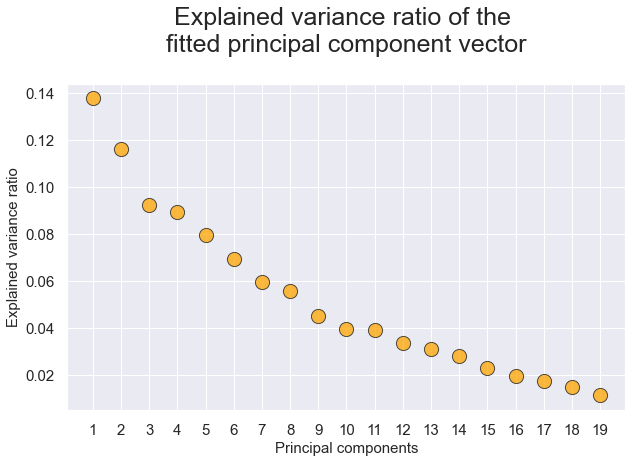

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca_fit.explained_variance_ratio_))],
            y=pca_fit.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca_fit.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

# Cumulative Variance Values

In [65]:
def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))

    return pca.explained_variance_ratio_.cumsum()[-1:]
for i in range(1,20):
    print('Components:\t', i, '=\t', get_variance(data, i),
          '\tCumulative Variance')


Components:	 1 =	 [0.10271235] 	Cumulative Variance
Components:	 2 =	 [0.1975428] 	Cumulative Variance
Components:	 3 =	 [0.27346475] 	Cumulative Variance
Components:	 4 =	 [0.34497206] 	Cumulative Variance
Components:	 5 =	 [0.41327341] 	Cumulative Variance
Components:	 6 =	 [0.47814313] 	Cumulative Variance
Components:	 7 =	 [0.53979805] 	Cumulative Variance
Components:	 8 =	 [0.59786768] 	Cumulative Variance
Components:	 9 =	 [0.65346673] 	Cumulative Variance
Components:	 10 =	 [0.70790021] 	Cumulative Variance
Components:	 11 =	 [0.75331663] 	Cumulative Variance
Components:	 12 =	 [0.79456437] 	Cumulative Variance
Components:	 13 =	 [0.83268488] 	Cumulative Variance
Components:	 14 =	 [0.87065543] 	Cumulative Variance
Components:	 15 =	 [0.90377853] 	Cumulative Variance
Components:	 16 =	 [0.93285093] 	Cumulative Variance
Components:	 17 =	 [0.95989705] 	Cumulative Variance
Components:	 18 =	 [0.98183763] 	Cumulative Variance
Components:	 19 =	 [1.] 	Cumulative Variance


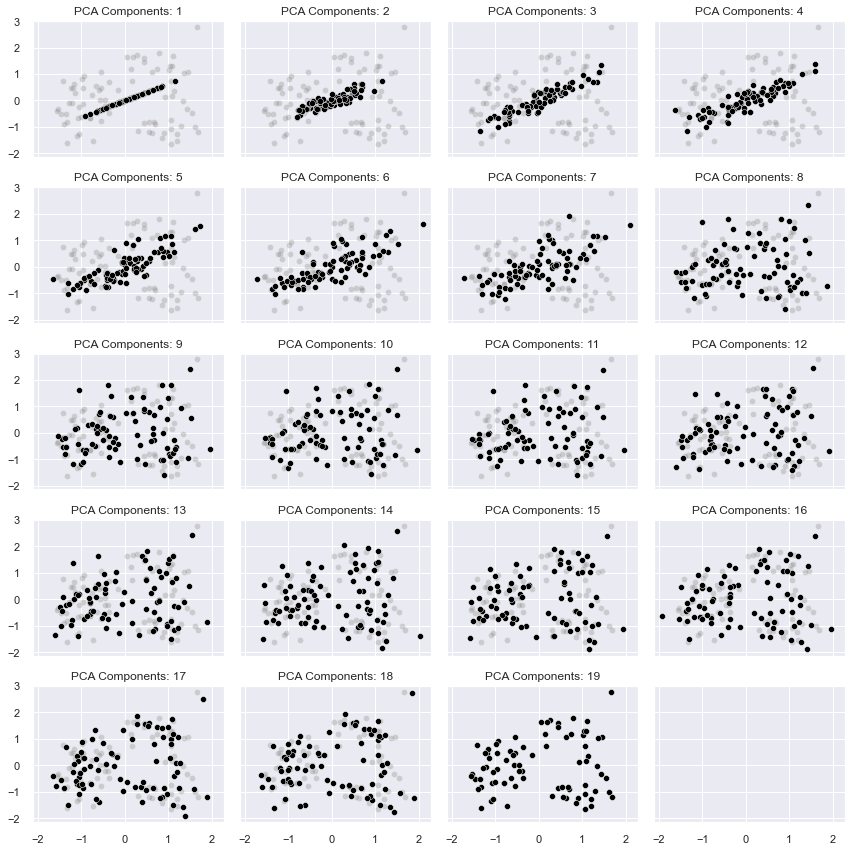

In [66]:
def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new

rows = 5
cols = 4
comps = 1

X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(rows,
                         cols,
                         figsize=(12,12),
                         sharex=True,
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0],
                                 y=X_scaled[:, 1],
                                 ax=axes[row, col],
                                 color='grey',
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0],
                                 y=X_new[:, 1],
                                 ax=axes[row, col],
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.show()


#### *Pca Another Scree Plot*

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [19] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[16]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


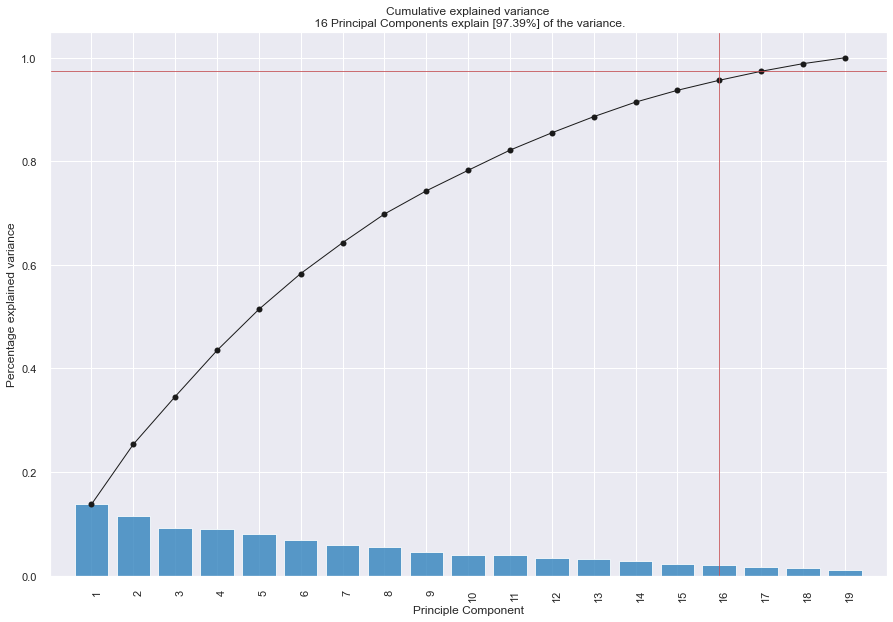

<Figure size 720x720 with 0 Axes>

In [71]:
model = pca()
results = model.fit_transform(data)
fig, ax = model.plot()

### *Fig Pca Biplot*

[pca] >Plot PC1 vs PC2 with loadings.


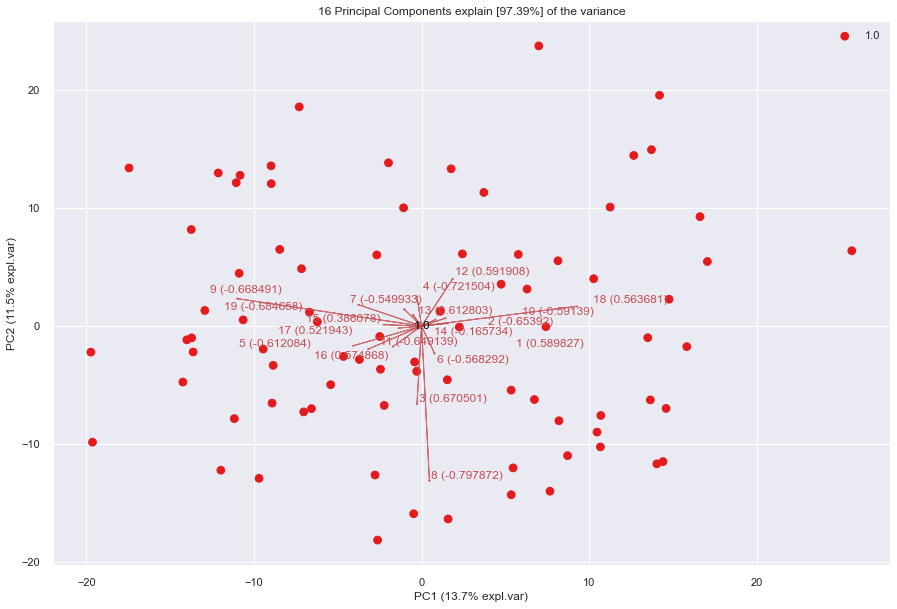

In [72]:
fig, ax = model.biplot(n_feat=19)
plt.show()

# *Factor Analysis*

### *Bartlett Test*

In [75]:
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(142.50151423882878, 0.9451418897192119)

### *Kaiser-Meyer-Olkin (KMO) Test*

In [76]:
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.44178295089230585

In [77]:
fa = FactorAnalyzer(rotation=None,n_factors=10)
fa.fit(data)

FactorAnalyzer(n_factors=10, rotation=None, rotation_kwargs={})

###### *We set the number of components as base 10*

### *Loadings*

In [79]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4,5,6,7,8,9
0,-0.72,0.20,0.39,0.43,0.05,-0.19,0.24,-0.03,-0.05,-0.00
1,-0.18,0.00,0.16,-0.01,-0.09,0.21,-0.13,0.07,0.25,-0.19
2,-0.18,0.46,-0.06,0.34,-0.07,0.21,-0.27,0.21,0.12,0.01
3,-0.12,-0.40,0.12,0.03,-0.05,0.21,0.10,0.29,-0.08,0.08
4,0.41,0.00,-0.03,0.33,0.11,0.04,0.06,0.00,0.20,0.03
5,-0.09,0.39,-0.03,0.00,0.01,-0.04,-0.01,-0.06,-0.10,0.27
6,-0.00,-0.26,0.08,0.17,0.31,0.09,-0.09,-0.19,-0.07,0.35
7,0.17,0.59,-0.22,-0.13,0.36,0.26,0.33,0.13,0.06,0.03
8,0.32,-0.18,0.32,0.21,0.31,0.13,-0.16,0.27,-0.16,-0.10
9,-0.28,-0.41,-0.75,0.38,0.12,-0.01,0.16,0.05,0.03,-0.06


### *Communalities*

In [81]:
pd.DataFrame(fa.get_communalities())

,0
0,1.00
1,0.23
2,0.54
3,0.34
4,0.34
5,0.25
6,0.38
7,0.77
8,0.52
9,1.00


### *Eigenvalues*

In [83]:
eigenvalues_Factor, v = fa.get_eigenvalues()
pd.DataFrame(eigenvalues_Factor) # eigenvalues

,0
0,1.95
1,1.80
2,1.44
3,1.36
4,1.30
5,1.23
6,1.17
7,1.10
8,1.06
9,1.03


### *Scree Plot*

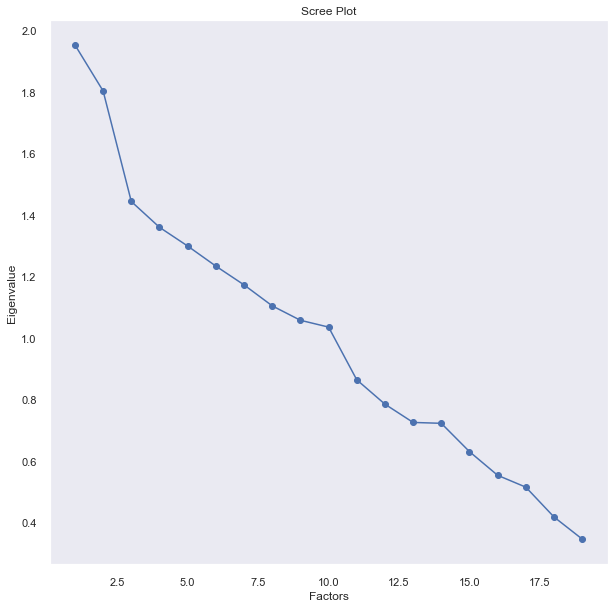

In [84]:
plt.scatter(range(1,df.shape[1]+1),eigenvalues_Factor)
plt.plot(range(1,df.shape[1]+1),eigenvalues_Factor)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


## *Factor Analysis With Rotation Varimax*

In [85]:
fa = FactorAnalyzer(rotation="varimax",n_factors=10)
fa.fit(data)

FactorAnalyzer(n_factors=10, rotation='varimax', rotation_kwargs={})

### *Factor Loadings Matrix*

In [86]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4,5,6,7,8,9
0,0.98,-0.05,0.02,-0.05,0.03,-0.10,0.07,0.08,-0.13,0.00
1,0.03,0.00,-0.08,-0.04,-0.09,-0.20,0.14,0.31,-0.10,-0.21
2,0.24,0.14,-0.06,0.28,-0.40,-0.39,0.07,0.05,0.22,-0.15
3,0.00,-0.04,0.09,-0.13,0.10,0.09,0.52,0.13,0.05,0.09
4,-0.12,0.53,0.08,0.12,-0.02,0.09,-0.07,0.03,0.07,0.04
5,0.20,-0.13,-0.15,0.26,-0.17,-0.01,-0.17,-0.10,0.12,0.13
6,0.02,0.14,0.05,-0.07,0.04,-0.05,0.05,0.05,-0.08,0.58
7,-0.06,0.03,-0.01,0.86,0.05,0.01,-0.09,-0.10,-0.09,-0.07
8,-0.12,0.45,-0.19,-0.05,0.25,-0.18,0.36,-0.16,-0.01,0.12
9,0.01,-0.02,0.98,-0.04,-0.08,-0.08,0.10,-0.06,0.07,0.08


### *The Original Correlation Matrix*

In [89]:
pd.DataFrame(fa.corr_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.00,0.11,0.23,0.04,-0.17,0.15,0.04,-0.11,-0.10,0.03,-0.14,0.08,0.06,-0.16,-0.13,-0.05,0.01,-0.07,-0.16
1,0.11,1.00,0.12,0.08,-0.03,-0.11,-0.09,-0.04,-0.03,-0.10,-0.10,0.16,-0.04,-0.04,-0.11,-0.06,-0.05,0.02,0.03
2,0.23,0.12,1.00,-0.12,0.07,0.16,-0.10,0.17,0.04,-0.01,-0.02,-0.01,-0.25,0.08,-0.15,0.09,-0.05,-0.05,-0.08
3,0.04,0.08,-0.12,1.00,-0.05,-0.12,0.08,-0.18,0.17,0.14,-0.20,0.16,0.05,0.01,0.09,-0.01,-0.13,0.05,-0.05
4,-0.17,-0.03,0.07,-0.05,1.00,-0.02,0.08,0.11,0.18,0.07,0.11,-0.02,0.02,0.06,0.18,0.06,0.13,-0.29,0.18
5,0.15,-0.11,0.16,-0.12,-0.02,1.00,-0.02,0.22,-0.15,-0.15,0.05,-0.04,-0.07,0.04,-0.10,0.09,-0.05,0.03,-0.01
6,0.04,-0.09,-0.10,0.08,0.08,-0.02,1.00,-0.10,0.16,0.09,-0.01,0.06,-0.01,-0.05,-0.07,-0.15,-0.13,-0.11,0.06
7,-0.11,-0.04,0.17,-0.18,0.11,0.22,-0.10,1.00,-0.04,-0.06,0.02,-0.18,0.04,-0.06,0.04,-0.05,-0.02,0.00,-0.09
8,-0.10,-0.03,0.04,0.17,0.18,-0.15,0.16,-0.04,1.00,-0.15,-0.00,-0.07,0.18,-0.04,0.03,0.03,0.02,-0.20,0.11
9,0.03,-0.10,-0.01,0.14,0.07,-0.15,0.09,-0.06,-0.15,1.00,-0.05,-0.02,-0.10,0.08,-0.15,-0.02,-0.02,0.09,0.00


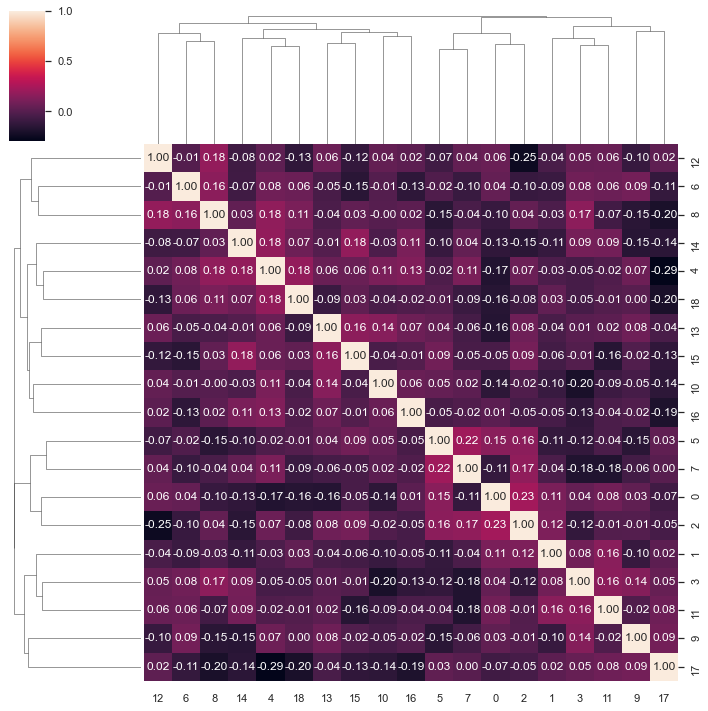

In [90]:
sns.clustermap(fa.corr_, annot=True, fmt = ".2f")
plt.show()

### *Rotation Matrix*



In [92]:
fa_rotation_matrix = fa.rotation_matrix_
pd.DataFrame(fa.rotation_matrix_)

,0,1,2,3,4,5,6,7,8,9
0,0.62,0.09,0.24,-0.58,0.07,-0.14,0.33,0.13,0.25,-0.02
1,-0.29,0.64,0.39,0.03,-0.28,-0.37,-0.16,0.08,0.20,-0.27
2,-0.35,-0.24,0.75,-0.23,0.26,0.22,0.07,-0.21,-0.21,0.04
3,0.48,0.10,0.32,0.70,0.33,-0.12,0.09,-0.11,-0.13,-0.09
4,0.01,0.39,-0.14,-0.19,0.58,-0.07,-0.43,-0.27,0.09,0.43
5,0.29,0.37,0.06,-0.04,-0.46,0.58,-0.09,-0.39,-0.23,0.10
6,-0.28,0.36,-0.27,0.01,0.25,0.10,0.74,-0.25,-0.02,-0.14
7,-0.00,0.23,-0.00,-0.01,0.33,0.58,-0.15,0.63,0.00,-0.31
8,-0.08,-0.11,0.13,0.25,-0.05,0.32,0.07,-0.09,0.86,0.22
9,-0.08,0.18,0.13,0.13,-0.14,-0.04,0.28,0.48,-0.20,0.75


In [93]:
fa = factanal(data, factors=10, scores='regression', rotation='varimax',
                  verbose=True, return_dict=True)


Uniquenesses: 
 [1] 0.005 0.872 0.005 0.679 0.662 0.005 0.860 0.654 0.473 0.005 0.834 0.401
[13] 0.587 0.624 0.247 0.739 0.876 0.570 0.737

Loadings:
      Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8 Factor9
 [1,]  0.116   0.969                                                   0.117 
 [2,]                 -0.146  -0.131          -0.121           0.204         
 [3,]  0.970   0.132                                                  -0.110 
 [4,] -0.119                   0.125   0.255   0.136  -0.389   0.153         
 [5,]  0.109  -0.148           0.127   0.308   0.185   0.387                 
 [6,]                  0.978                                                 
 [7,] -0.120                           0.292                                 
 [8,]  0.252  -0.186   0.240                   0.101   0.127  -0.215   0.172 
 [9,]                         -0.135   0.678                  -0.100   0.116 
[10,]                          0.983                                  

### *We decided to continue our new data with non-rotational scores.*

In [95]:
fa = FactorAnalyzer(rotation=None,n_factors=10)
new_data = fa.fit_transform(data)

In [97]:
new_data_df = pd.DataFrame(new_data)

In [100]:
new_data_df.shape

(81, 10)

In [99]:
new_data_df.head(20)

,0,1,2,3,4,5,6,7,8,9
0,0.65,-0.29,0.12,-0.22,0.72,0.24,0.11,0.01,0.47,1.15
1,1.56,0.47,-0.52,1.06,0.66,0.45,-1.49,-0.09,0.25,0.18
2,-0.09,0.16,0.12,0.94,-1.05,-1.81,1.31,0.36,0.68,0.52
3,1.39,0.03,0.16,-0.49,0.42,0.35,0.08,-1.41,-0.47,-0.60
4,1.55,-0.34,-0.26,-0.81,0.81,0.88,1.32,0.44,-0.04,-0.60
5,0.74,1.19,-0.50,-0.92,-0.21,-0.25,0.71,0.02,0.42,-0.72
6,1.30,-0.44,2.01,-0.09,-0.72,0.11,-1.04,0.15,-0.01,-0.40
7,1.03,0.85,-0.76,0.40,-0.33,-0.06,0.07,-0.96,0.94,0.65
8,-0.59,-1.95,0.54,-1.57,0.22,-0.52,-1.07,0.87,0.13,0.22
9,0.50,-0.04,-0.13,-0.42,-0.41,-0.39,-1.05,-0.16,2.39,-0.57


#### *Name of New Variables (Yeni Değişkenlerin İsimleri)*

In [104]:
#Y1: Dış görünüşünün çok önemli olmayıp yaşam kalitesinin yüksek olması
#Y2: Dinine önem veren sorumlulukları paylaşan
#Y3: Eğitim düzeyi yüksek farklı siyasi görüş yapısına sahip ve kuvvetli duygusal bağ paylaşımı
#Y4: Dış görünüşün önemli ve yaşam kalitesinin yüksek olduğu düzenli bir hayat
#Y5: Kültürlerin uyuştuğu ve mantıksal
#Y6: Yaşça büyük becerikli hiç evlenmemiş
#Y7: Aynı kültüre sahip yaşam standartları yüksek
#Y8: Benzer hayat tarzına sahip
#Y9: Dini Görüşün önemli olmadığı mantıksal evlilik ve işinin düzenli olduğu
#Y10: Aynı kültüre sahip varlıklı bir aileye sahip

In [129]:
data_new = pd.read_excel("data_new.xlsx")
data_new.head(20)

,Dış görünüşünün çok önemli olmayıp yaşam kalitesinin yüksek olması,Dinine önem veren sorumlulukları paylaşan,Eğitim düzeyi yüksek farklı siyasi görüş yapısına sahip ve kuvvetli duygusal bağ paylaşımı,Dış görünüşün önemli ve yaşam kalitesinin yüksek olduğu düzenli bir hayat,Kültürlerin uyuştuğu ve mantıksal,Yaşça büyük becerikli hiç evlenmemiş,Aynı kültüre sahip yaşam standartları yüksek,Benzer hayat tarzına sahip,Dini Görüşün önemli olmadığı mantıksal evlilik ve işinin düzenli olduğu,Aynı kültüre sahip varlıklı bir aileye sahip,İlk 40 Şehir - Son 41 Şehir
0,0.65,-0.29,0.12,-0.22,0.72,0.24,0.11,0.01,0.47,1.15,1
1,1.56,0.47,-0.52,1.06,0.66,0.45,-1.49,-0.09,0.25,0.18,1
2,-0.09,0.16,0.12,0.94,-1.05,-1.81,1.31,0.36,0.68,0.52,1
3,1.39,0.03,0.16,-0.49,0.42,0.35,0.08,-1.41,-0.47,-0.60,1
4,1.55,-0.34,-0.26,-0.81,0.81,0.88,1.32,0.44,-0.04,-0.60,1
5,0.74,1.19,-0.50,-0.92,-0.21,-0.25,0.71,0.02,0.42,-0.72,1
6,1.30,-0.44,2.01,-0.09,-0.72,0.11,-1.04,0.15,-0.01,-0.40,1
7,1.03,0.85,-0.76,0.40,-0.33,-0.06,0.07,-0.96,0.94,0.65,1
8,-0.59,-1.95,0.54,-1.57,0.22,-0.52,-1.07,0.87,0.13,0.22,1
9,0.50,-0.04,-0.13,-0.42,-0.41,-0.39,-1.05,-0.16,2.39,-0.57,1


In [105]:
new_data_df.describe([0,0.05,0.25,0.5,0.75,0.95,0.99,1]).T

,count,mean,std,min,0%,5%,25%,50%,75%,95%,99%,100%,max
0,81.00,0.00,0.93,-1.78,-1.78,-1.63,-0.59,-0.05,0.73,1.39,1.79,1.91,1.91
1,81.00,-0.00,0.91,-1.95,-1.95,-1.64,-0.59,0.13,0.68,1.31,1.91,2.03,2.03
2,81.00,0.00,0.97,-1.85,-1.85,-1.36,-0.68,-0.09,0.61,1.83,2.08,2.27,2.27
3,81.00,0.00,0.88,-2.31,-2.31,-1.56,-0.60,0.08,0.64,1.21,2.16,2.34,2.34
4,81.00,-0.00,0.80,-1.89,-1.89,-1.17,-0.53,-0.06,0.66,1.27,1.48,1.49,1.49
5,81.00,-0.00,0.75,-1.81,-1.81,-1.29,-0.50,0.05,0.56,1.22,1.42,1.52,1.52
6,81.00,0.00,0.81,-1.97,-1.97,-1.36,-0.55,0.01,0.53,1.24,1.76,1.76,1.76
7,81.00,0.00,0.71,-1.60,-1.60,-1.01,-0.36,0.01,0.44,1.17,1.59,1.86,1.86
8,81.00,0.00,0.66,-1.17,-1.17,-0.93,-0.47,-0.12,0.42,1.05,1.79,2.39,2.39
9,81.00,0.00,0.62,-1.36,-1.36,-0.94,-0.47,0.02,0.45,1.05,1.31,1.42,1.42


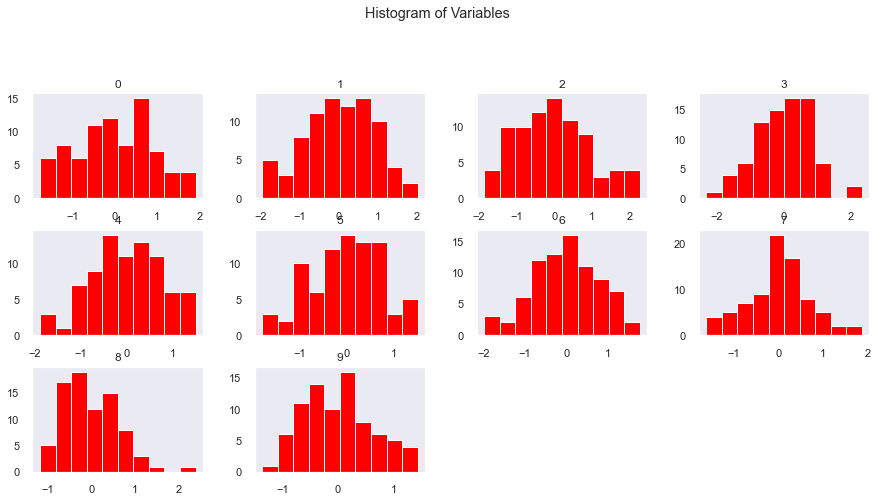

In [127]:
# Histogram of Variables
new_data_df.hist(layout=(5,4),color="red", figsize=(15,12), grid=False)
plt.suptitle("Histogram of Variables")
plt.show()


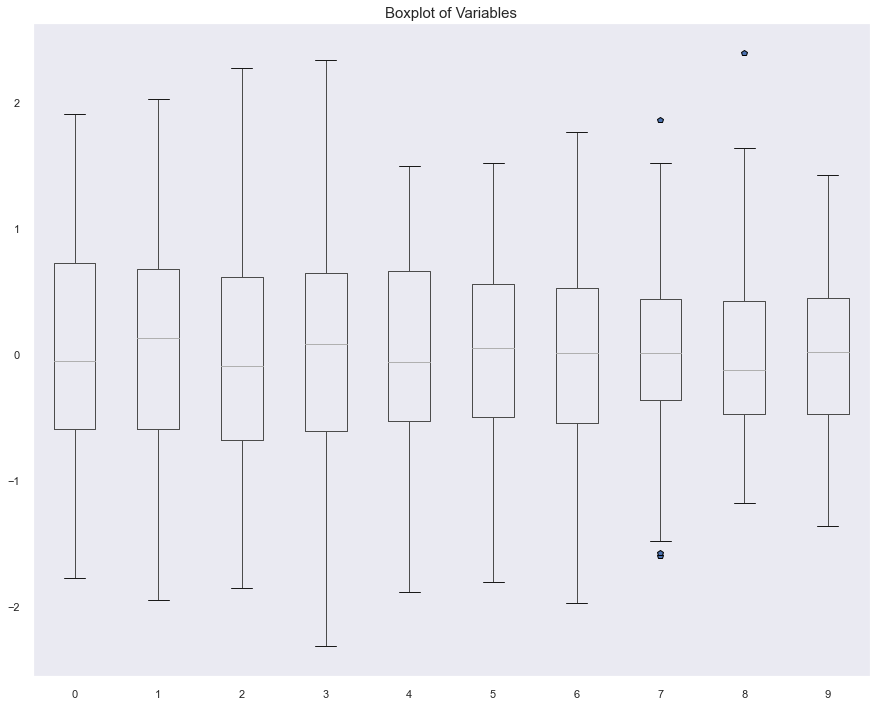

In [108]:
# Boxplot of Variables
bit = dict(markerfacecolor="b", marker="p")
boxplot = new_data_df.boxplot(figsize=(15,12), grid=False,flierprops=bit)
plt.title("Boxplot of Variables",fontsize=15)
plt.show()

                                        Some variables ( 7th and 8th ) seem to have outliers

In [113]:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5*iqr
    up_limit = quartile3 + 1.5*iqr
    return low_limit,up_limit

In [ ]:
# Is there an outlier or not?
def check_outlier(dataframe,col_name):
    low,up = outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] < low) | (dataframe[col_name]>up)].any(axis=None):
        return True
    else:
        return False

In [112]:
for col in new_data_df.columns:
    print(col,":",check_outlier(new_data_df,col))

0 : False
1 : False
2 : False
3 : False
4 : False
5 : False
6 : False
7 : True
8 : True
9 : False


### *As seen in the boxplot graph, there are outliers in the 7th and 8th variables.*

In [118]:
# Which observations outlier ?
def grab_outliers(dataframe,col,index=False):
    low,up = outlier_thresholds(dataframe,col)
    if not dataframe[(dataframe[col] < low) | (dataframe[col] > up)].any(axis=None):
        print("There is no outlier")
        return 0
    if dataframe[(dataframe[col] < low) | (dataframe[col] > up)].shape[0] > 10:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)].head())
    else:
        print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)])
    if index:
        return dataframe[(dataframe[col] < low) | (dataframe[col] > up)].index

In [119]:
for col in new_data_df.columns:
    print(col,":",grab_outliers(new_data_df,col))

There is no outlier
0 : 0
There is no outlier
1 : 0
There is no outlier
2 : 0
There is no outlier
3 : 0
There is no outlier
4 : 0
There is no outlier
5 : 0
There is no outlier
6 : 0
       0     1     2     3     4     5     6     7     8     9
26  0.46 -0.75 -0.91  0.07 -0.53  0.86 -0.51  1.86  0.31  0.19
56 -0.07 -1.06 -0.66 -1.56  0.46  1.22 -0.78 -1.60 -0.31 -0.37
62  0.26  0.93  0.61  0.30 -0.08 -0.25 -0.24 -1.57 -0.18  0.06
7 : None
     0     1     2     3     4     5     6     7    8     9
9 0.50 -0.04 -0.13 -0.42 -0.41 -0.39 -1.05 -0.16 2.39 -0.57
8 : None
There is no outlier
9 : 0


#### *26,56,62.9 observations are outliers. We ignored this outliers as the new data is normally distributed.*

### *Normalitiy Test of New Data - ( SHAPIRO )*


In [120]:
shapiro(new_data_df)

ShapiroResult(statistic=0.9979612827301025, pvalue=0.4418172836303711)

### *Perform the Multivariate Normality Test*

In [121]:
multivariate_normality(data, alpha=.05)

HZResults(hz=1.0005187780037468, pval=0.01009605399204732, normal=False)

# *Fittng Discriminant Model*

In [130]:
x = data_new.drop("İlk 40 Şehir - Son 41 Şehir",axis=1)
y = data_new["İlk 40 Şehir - Son 41 Şehir"]

In [131]:
clf = LDA().fit(x,y)

In [132]:
clf.score(x,y)

0.6172839506172839

In [133]:
y_pred = clf.predict(x)

In [136]:
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2], dtype=int64)

### *Classification Report*

In [137]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.61      0.62      0.62        40
           2       0.62      0.61      0.62        41

    accuracy                           0.62        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.62      0.62      0.62        81



### *Roc Auc Score*

In [138]:
roc_auc_score(y,y_pred)

0.6173780487804879

## *Hyperparameter optimization*

In [139]:
parameters = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto', 0.5, 0.9]}

In [141]:
lda = LDA()
clf = GridSearchCV(lda, parameters)
clf.fit(x, y)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [None, 'auto', 0.5, 0.9],
                         'solver': ['svd', 'lsqr', 'eigen']})

In [142]:
print(clf.best_params_)

{'shrinkage': 0.9, 'solver': 'lsqr'}


In [143]:
y_pred = clf.predict(x)

In [144]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.62      0.60      0.61        40
           2       0.62      0.63      0.63        41

    accuracy                           0.62        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.62      0.62      0.62        81



# *K MEANS*

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=3), k=(1, 4))

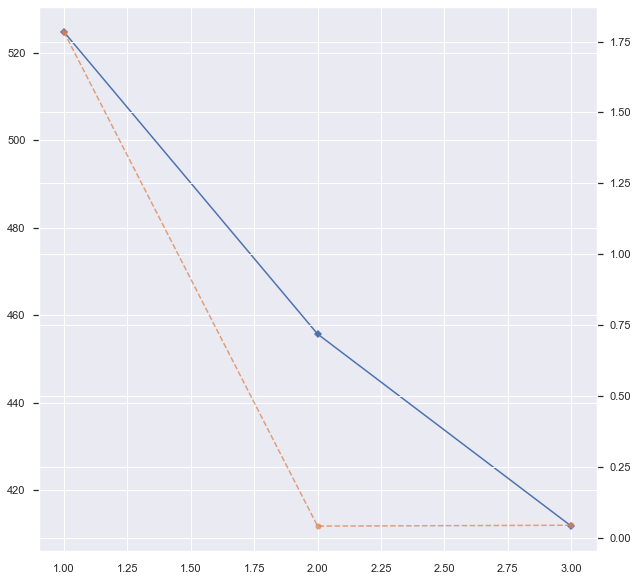

In [195]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(1,4))
elbow.fit(x)

#### *The graph tells us that the ideal set is 2.*

### *Final Cluster*

In [197]:
kmeans = KMeans(n_clusters=2).fit(x)

In [158]:
kmeans.n_clusters

2

In [198]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9
0,0.68,-0.08,-0.26,-0.44,-0.03,0.11,-0.29,0.09,0.06,0.01
1,-0.69,0.08,0.27,0.45,0.03,-0.12,0.29,-0.09,-0.07,-0.01


In [206]:
kmeans.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [201]:
clusters_kmeans = kmeans.labels_

In [207]:
X = x

In [208]:
X["cluster"] = clusters_kmeans

In [209]:
X.head(20)

,Dış görünüşünün çok önemli olmayıp yaşam kalitesinin yüksek olması,Dinine önem veren sorumlulukları paylaşan,Eğitim düzeyi yüksek farklı siyasi görüş yapısına sahip ve kuvvetli duygusal bağ paylaşımı,Dış görünüşün önemli ve yaşam kalitesinin yüksek olduğu düzenli bir hayat,Kültürlerin uyuştuğu ve mantıksal,Yaşça büyük becerikli hiç evlenmemiş,Aynı kültüre sahip yaşam standartları yüksek,Benzer hayat tarzına sahip,Dini Görüşün önemli olmadığı mantıksal evlilik ve işinin düzenli olduğu,Aynı kültüre sahip varlıklı bir aileye sahip,cluster
0,0.65,-0.29,0.12,-0.22,0.72,0.24,0.11,0.01,0.47,1.15,0
1,1.56,0.47,-0.52,1.06,0.66,0.45,-1.49,-0.09,0.25,0.18,0
2,-0.09,0.16,0.12,0.94,-1.05,-1.81,1.31,0.36,0.68,0.52,1
3,1.39,0.03,0.16,-0.49,0.42,0.35,0.08,-1.41,-0.47,-0.60,0
4,1.55,-0.34,-0.26,-0.81,0.81,0.88,1.32,0.44,-0.04,-0.60,0
5,0.74,1.19,-0.50,-0.92,-0.21,-0.25,0.71,0.02,0.42,-0.72,0
6,1.30,-0.44,2.01,-0.09,-0.72,0.11,-1.04,0.15,-0.01,-0.40,0
7,1.03,0.85,-0.76,0.40,-0.33,-0.06,0.07,-0.96,0.94,0.65,0
8,-0.59,-1.95,0.54,-1.57,0.22,-0.52,-1.07,0.87,0.13,0.22,0
9,0.50,-0.04,-0.13,-0.42,-0.41,-0.39,-1.05,-0.16,2.39,-0.57,0


In [210]:
X["cluster"] = X["cluster"] + 1

In [212]:
X.head(20)

,Dış görünüşünün çok önemli olmayıp yaşam kalitesinin yüksek olması,Dinine önem veren sorumlulukları paylaşan,Eğitim düzeyi yüksek farklı siyasi görüş yapısına sahip ve kuvvetli duygusal bağ paylaşımı,Dış görünüşün önemli ve yaşam kalitesinin yüksek olduğu düzenli bir hayat,Kültürlerin uyuştuğu ve mantıksal,Yaşça büyük becerikli hiç evlenmemiş,Aynı kültüre sahip yaşam standartları yüksek,Benzer hayat tarzına sahip,Dini Görüşün önemli olmadığı mantıksal evlilik ve işinin düzenli olduğu,Aynı kültüre sahip varlıklı bir aileye sahip,cluster
0,0.65,-0.29,0.12,-0.22,0.72,0.24,0.11,0.01,0.47,1.15,1
1,1.56,0.47,-0.52,1.06,0.66,0.45,-1.49,-0.09,0.25,0.18,1
2,-0.09,0.16,0.12,0.94,-1.05,-1.81,1.31,0.36,0.68,0.52,2
3,1.39,0.03,0.16,-0.49,0.42,0.35,0.08,-1.41,-0.47,-0.60,1
4,1.55,-0.34,-0.26,-0.81,0.81,0.88,1.32,0.44,-0.04,-0.60,1
5,0.74,1.19,-0.50,-0.92,-0.21,-0.25,0.71,0.02,0.42,-0.72,1
6,1.30,-0.44,2.01,-0.09,-0.72,0.11,-1.04,0.15,-0.01,-0.40,1
7,1.03,0.85,-0.76,0.40,-0.33,-0.06,0.07,-0.96,0.94,0.65,1
8,-0.59,-1.95,0.54,-1.57,0.22,-0.52,-1.07,0.87,0.13,0.22,1
9,0.50,-0.04,-0.13,-0.42,-0.41,-0.39,-1.05,-0.16,2.39,-0.57,1


#### *Cities in cluster 1*

In [214]:
X[X["cluster"]==1]   

,Dış görünüşünün çok önemli olmayıp yaşam kalitesinin yüksek olması,Dinine önem veren sorumlulukları paylaşan,Eğitim düzeyi yüksek farklı siyasi görüş yapısına sahip ve kuvvetli duygusal bağ paylaşımı,Dış görünüşün önemli ve yaşam kalitesinin yüksek olduğu düzenli bir hayat,Kültürlerin uyuştuğu ve mantıksal,Yaşça büyük becerikli hiç evlenmemiş,Aynı kültüre sahip yaşam standartları yüksek,Benzer hayat tarzına sahip,Dini Görüşün önemli olmadığı mantıksal evlilik ve işinin düzenli olduğu,Aynı kültüre sahip varlıklı bir aileye sahip,cluster
0,0.65,-0.29,0.12,-0.22,0.72,0.24,0.11,0.01,0.47,1.15,1
1,1.56,0.47,-0.52,1.06,0.66,0.45,-1.49,-0.09,0.25,0.18,1
3,1.39,0.03,0.16,-0.49,0.42,0.35,0.08,-1.41,-0.47,-0.60,1
4,1.55,-0.34,-0.26,-0.81,0.81,0.88,1.32,0.44,-0.04,-0.60,1
5,0.74,1.19,-0.50,-0.92,-0.21,-0.25,0.71,0.02,0.42,-0.72,1
6,1.30,-0.44,2.01,-0.09,-0.72,0.11,-1.04,0.15,-0.01,-0.40,1
7,1.03,0.85,-0.76,0.40,-0.33,-0.06,0.07,-0.96,0.94,0.65,1
8,-0.59,-1.95,0.54,-1.57,0.22,-0.52,-1.07,0.87,0.13,0.22,1
9,0.50,-0.04,-0.13,-0.42,-0.41,-0.39,-1.05,-0.16,2.39,-0.57,1
10,-0.56,-1.01,-1.34,-1.06,-0.51,1.03,-0.53,0.24,-0.08,-0.78,1


#### *Cities in cluster 2*

In [215]:
X[X["cluster"]==2]   # Cities in cluster 2

,Dış görünüşünün çok önemli olmayıp yaşam kalitesinin yüksek olması,Dinine önem veren sorumlulukları paylaşan,Eğitim düzeyi yüksek farklı siyasi görüş yapısına sahip ve kuvvetli duygusal bağ paylaşımı,Dış görünüşün önemli ve yaşam kalitesinin yüksek olduğu düzenli bir hayat,Kültürlerin uyuştuğu ve mantıksal,Yaşça büyük becerikli hiç evlenmemiş,Aynı kültüre sahip yaşam standartları yüksek,Benzer hayat tarzına sahip,Dini Görüşün önemli olmadığı mantıksal evlilik ve işinin düzenli olduğu,Aynı kültüre sahip varlıklı bir aileye sahip,cluster
2,-0.09,0.16,0.12,0.94,-1.05,-1.81,1.31,0.36,0.68,0.52,2
13,-1.50,0.44,0.13,-0.45,1.06,-0.94,1.20,-1.01,-0.21,-1.36,2
14,0.37,1.13,2.01,0.37,0.82,0.41,1.14,-0.17,-0.42,1.19,2
19,-0.02,-1.08,-0.44,0.67,1.11,0.78,-0.06,-0.17,-0.61,-0.84,2
21,-0.67,0.63,-1.58,0.78,-0.22,-0.07,0.51,0.34,0.30,-1.03,2
23,-1.63,-1.64,-0.23,0.31,0.68,0.67,-0.89,-0.09,0.75,0.66,2
24,-1.18,0.69,0.93,1.10,0.05,0.56,-0.29,1.15,0.51,-0.94,2
25,-1.03,0.18,-1.32,0.71,-0.12,0.43,0.59,0.22,-0.26,-0.21,2
27,-0.24,1.31,-0.48,1.07,1.27,0.05,0.01,-0.17,0.11,0.90,2
29,-0.27,1.31,1.83,0.76,0.07,-0.63,-0.81,-0.82,-0.18,-0.80,2


In [177]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

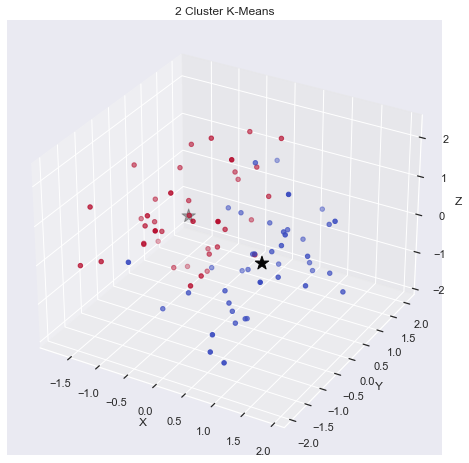

In [204]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2], c=kmeans.labels_, cmap='coolwarm')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='*', s=200, c='#050505')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2 Cluster K-Means')
plt.show()